In [3]:
# Is new data complete?

import pickle
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

HDF5_FILE_PATH = os.path.join('../data', 'train.hdf5') # Path to your HDF5 file
SNR_TO_VISUALIZE = 'snr_-5.0'  # Which SNR dataset to load (must match a key in the HDF5 file)
NUM_SIGNAL_FREQS = 8        # Number of target signal frequencies, from your config

# --- Trial Window Configuration ---
USE_TRIAL_WINDOW = True     # Set to True to view a slice of trials, False to view all
TRIAL_WINDOW_START = 0      # The starting trial index for the window
TRIAL_WINDOW_SIZE = 90      # The number of trials to include in the window

# --- Snapshot/Tracking Configuration (uses indices relative to the window if active) ---
TRIAL_TO_SNAPSHOT = 50      # Which trial to use for the detailed snapshot plot
FREQ_TO_TRACK = 7           # Which frequency to track over time (0-7 are targets, 8-15 are noise)
"""
Loads HDF5 simulation data and generates plots for a specific SNR.
"""
data_path = HDF5_FILE_PATH

print(f"Loading HDF5 data from: {data_path}")
try:
    with h5py.File(data_path, 'r') as f:
        if SNR_TO_VISUALIZE not in f:
            print(f"Error: SNR key '{SNR_TO_VISUALIZE}' not found in HDF5 file.")
            print(f"Available keys: {list(f.keys())}")
        
        # Shape: (trials, frequencies, features)
        full_trial_data = f[SNR_TO_VISUALIZE]['metrics'][:]
        
except FileNotFoundError:
    print(f"Error: The file '{data_path}' was not found.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
full_trial_data.shape

Loading HDF5 data from: ../data\train.hdf5


(15000, 16, 7)

Visualizing a window of 90 trials (from index 0 to 89).
Data loaded for snr_-5.0. Final shape for plotting: (90, 16, 7)
Saved 'visualization_hdf5_1_overview_by_feature.png'


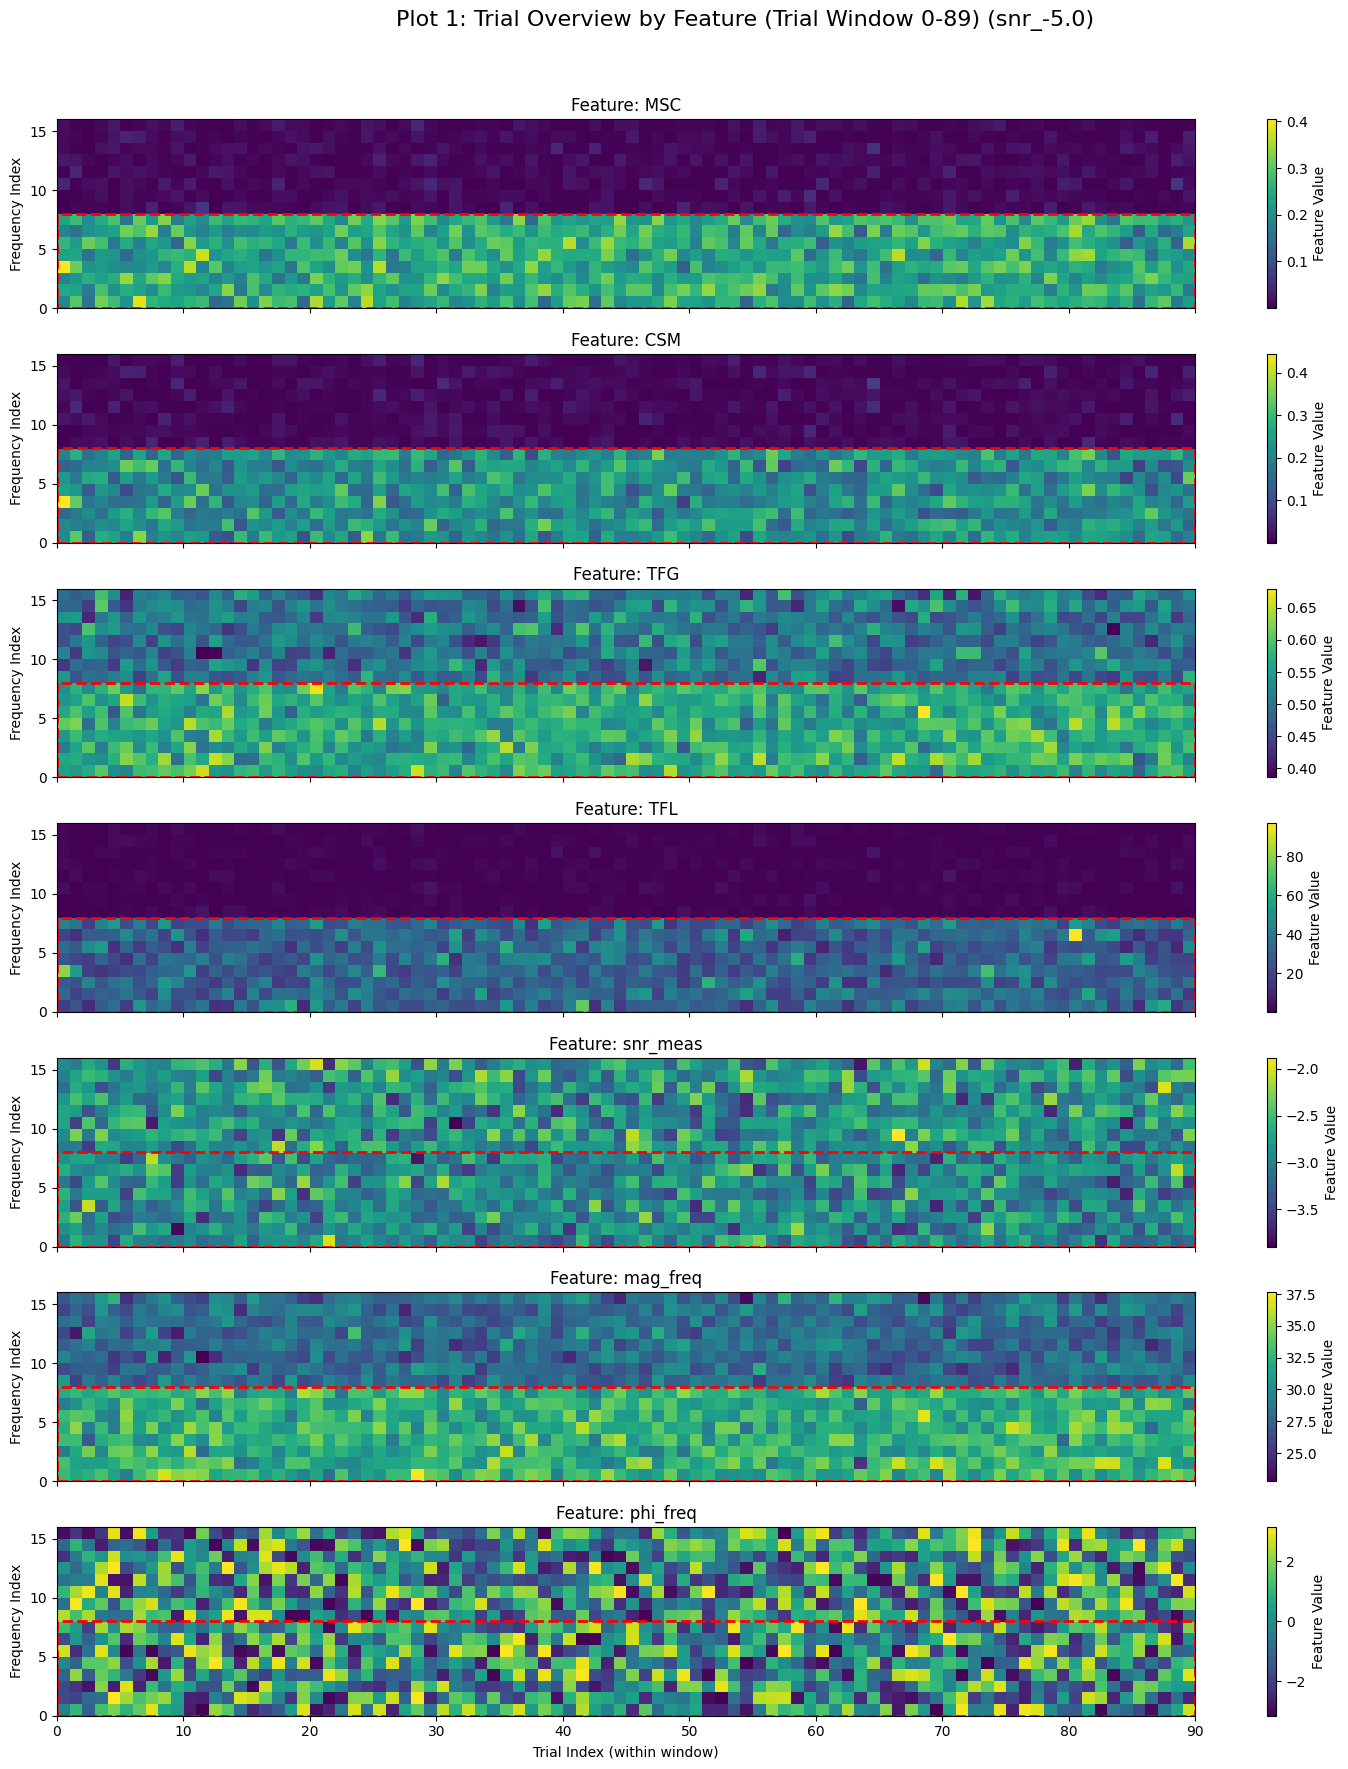

In [ ]:

# -*- coding: utf-8 -*-
"""
Data Visualization Script for HDF5 Monte Carlo Simulation Data.

This script loads the HDF5 data generated by the simulation and creates
several plots to visualize the features for a specific Signal-to-Noise Ratio (SNR).
It now includes an option to view a specific window of trials instead of the full dataset.
"""

# Feature names corresponding to the last dimension of the 'metrics' dataset
FEATURE_NAMES = ['MSC', 'CSM', 'TFG', 'TFL', 'snr_meas', 'mag_freq', 'phi_freq']

def visualize_hdf5_data(data_path):
    
    
    # --- Apply Trial Window Slice if enabled ---
    if USE_TRIAL_WINDOW:
        start = TRIAL_WINDOW_START
        end = start + TRIAL_WINDOW_SIZE
        if start >= full_trial_data.shape[0]:
            print(f"Error: TRIAL_WINDOW_START ({start}) is beyond the available trials ({full_trial_data.shape[0]}).")
            return
        trial_data = full_trial_data[start:end, :, :]
        print(f"Visualizing a window of {trial_data.shape[0]} trials (from index {start} to {end-1}).")
    else:
        trial_data = full_trial_data
        print("Visualizing all available trials.")

    num_trials, num_frequencies, num_features = trial_data.shape
    print(f"Data loaded for {SNR_TO_VISUALIZE}. Final shape for plotting: {trial_data.shape}")

    # --- Plot 1: Overview of Trial Window for EACH Feature ---
    fig1, axes = plt.subplots(num_features, 1, figsize=(15, 18), sharex=True, sharey=True)
    window_title = f"(Trial Window {TRIAL_WINDOW_START}-{TRIAL_WINDOW_START+num_trials-1})" if USE_TRIAL_WINDOW else ""
    fig1.suptitle(f'Plot 1: Trial Overview by Feature {window_title} ({SNR_TO_VISUALIZE})', fontsize=16)

    for i in range(num_features):
        ax = axes[i]
        feature_data = trial_data[:, :, i].T
        
        im = ax.imshow(feature_data, aspect='auto', cmap='viridis', origin='lower',
                       extent=[0, num_trials, 0, num_frequencies])
        
        rect = patches.Rectangle((0, 0), num_trials, NUM_SIGNAL_FREQS, linewidth=2, edgecolor='r', facecolor='none', linestyle='--')
        ax.add_patch(rect)
        
        ax.set_title(f'Feature: {FEATURE_NAMES[i]}')
        ax.set_ylabel('Frequency Index')
        fig1.colorbar(im, ax=ax, label='Feature Value')

    axes[-1].set_xlabel('Trial Index (within window)')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    fig1.savefig('visualization_hdf5_1_overview_by_feature.png')
    print("Saved 'visualization_hdf5_1_overview_by_feature.png'")
    plt.show()
    plt.close(fig1)
    


if __name__ == '__main__':
    visualize_hdf5_data(HDF5_FILE_PATH)
